# Graduate Employment Survey

---

## Main Question

1. How does the employment rate changes across universities ?

---

## List of URLs used:


1. Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD<br>
   https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd
   

2. Graduate Labour Market Statistics 2017<br>
   https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/701720/GLMS_2017.pdf

---

## Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

In [3]:
graduateEmploymentData = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', index_col='year')
graduateEmploymentData.head()

,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
year,,,,,,,,,,,
2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


### Background Information 


Datasets:

1. `graduateEmploymentData`
  - The Graduate Employment Survey (GES) is jointly conducted by NTU, NUS, SMU, SIT (from 2014), SUTD (from 2015) and SUSS (from 2018) annually to survey the employment conditions of graduates about six months after their final examinations. The Ministry of Education (MOE) publishes the results of key employment indicators of the survey to provide prospective students with timely and comparable data to assist them in making informed course decisions.  Graduates from NTU, NUS, SMU and SUSS are surveyed in Nov. Due to their different academic calendars, graduates
    from SUTD and SIT are surveyed in Feb and Mar.
  - Overall employment rate refers to the number of graduates working in full-time permanent, part-time, temporary or freelance basis, as a proportion of graduates in the labour force (i.e. those who were working, or not working but actively looking and available for work) approximately 6 months after completing their final examinations.
  - Full-time permanent employment rate refers to the number of graduates in employment of at least 35 hours a week and where the employment is not temporary (including contracts of one year or more), as a proportion of graduates in the labour force (i.e. those who were working, or not working but actively looking and available for work) approximately 6 months after completing their final examinations.
  - Basic monthly salary pertains only to full-time permanently employed graduates. It comprises basic pay before deduction of the employee’s CPF contributions and personal income tax. Employer’s CPF contributions, bonuses, stock options, overtime payments, commissions, fixed allowances, other regular cash payments, lump sum payments, and payments-in-kind are excluded.
  - Gross monthly salary pertains only to full-time permanently employed graduates. It comprises basic salary, overtime payments, commissions, fixed allowances, and other regular cash payments, before deductions of the employee’s CPF contributions and personal income tax. Employer’s CPF contributions, bonuses, stock options, lump sum payments, and payments-in-kind are excluded.
  - The dataset coverage period ranges from 2013-01-01 to 2018-12-31.

Employment Rate is among the most important indicators of a country, because it directly reflects social and economic performance of the population. 

Universities role in society is to form specialists with different skills and qualifications. Hence, different universites have a different curiculum, culture and norm which directly affects the graduates employment rate. That is why it is important to choose the appropriate universities according to the students interest.

Universities which are listed in the datasets.

In [4]:
universities = ['Nanyang Technological University', 'National University of Singapore', 'Singapore Institute of Technology', 'Singapore Management University', 'Singapore University of Social Sciences', 'Singapore University of Technology and Design']

---

## Data Cleaning

As you may have noticed, some of the values in the datasets are set to 'na'. Which means the university's degree haven't been established at the time yet. Hence, we can ignore the time period where the values are set to 'na'.

In [5]:
# Replace the 'na' value to np.NaN
graduateEmploymentData = graduateEmploymentData.replace('na', np.NaN)

To have a better structure for analysis, all the categorical variables should be a `str` type. While numerical variables should be an `int64` or `float64` type.

**Categorical Variables**
1. `year`
2. `university`
3. `school`
4. `degree`

**Numerical Variables**
1. `employment_rate_overall`
2. `employment_rate_ft_perm`
3. `basic_monthly_mean`
4. `basic_monthly_median`
5. `gross_monthly_mean`
6. `gross_monthly_median`
7. `gross_mthly_25_percentile`
8. `gross_mthly_75_percentile`

In [6]:
# Convert the numerical variable employment_rate_overall to a numerical Datatype
graduateEmploymentData['employment_rate_overall'] = pd.to_numeric(graduateEmploymentData['employment_rate_overall'])

---

## Data Transformation

The dataframe `annualGraduateEmploymentData` represents the number of male and female graduates respectively across institutions. 

In [20]:
# The latest graduate employment data
annualGraduateEmploymentData = graduateEmploymentData.loc['2018']

---

## Data Analysis

### The latest average overall employment rate across universities

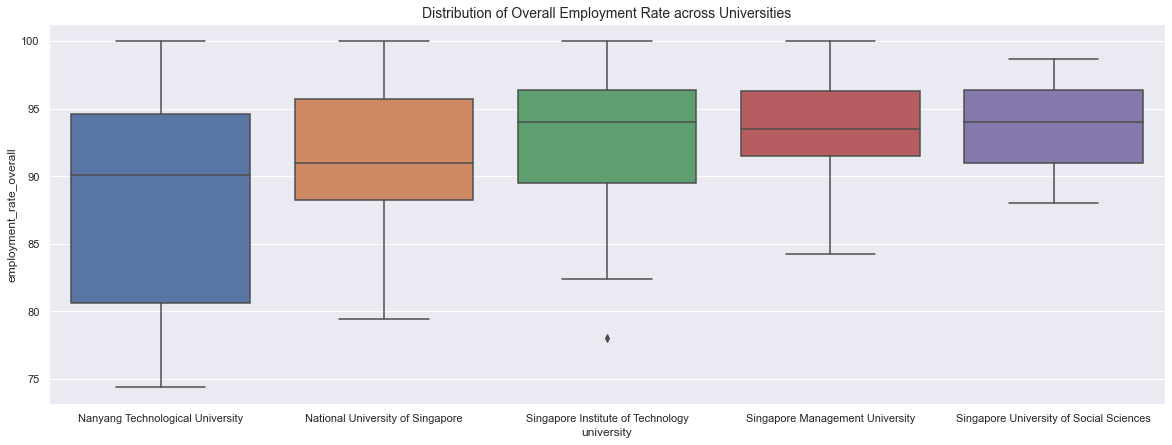

In [19]:
# Sets Figure Size
fig, ax = plt.subplots()
fig.set_size_inches([20,7])

# Plot a boxplot of overall employment rate for different university
sb.boxplot(x = 'university', y = 'employment_rate_overall', data = annualGraduateEmploymentData)

# Set Graph Title
plt.title('Distribution of Overall Employment Rate across Universities', fontsize = 14)

# Display the graph
plt.show()

As you may have noticed from the boxplot shown above, the data for Singapore University of Technology and Design is not shown in the boxplot due to the non-availability of the dataset. Hence, the analysis will only be based on the 5 universities shown above. 


Summary:
1. Nanyang Technological University
<br>25% of graduates has an overall employment rate ranges from 94.6% to 100%.
<br>25% of graduates has an overall employment rate ranges from 90.1% to 94.6%.
<br>25% of graduates has an overall employment rate ranges from 80.6% to 90.1%.
<br>25% of graduates has an overall employment rate ranges from 74.4% to 80.6%.
<br>Number of outliers: 0


2. National University of Singapore
<br>25% of graduates has an overall employment rate ranges from 95.7% to 100%.
<br>25% of graduates has an overall employment rate ranges from 91% to 95.7%.
<br>25% of graduates has an overall employment rate ranges from 88.2% to 91%.
<br>25% of graduates has an overall employment rate ranges from 79.4% to 88.2%.
<br>Number of outliers: 0


3. Singapore Institute of Technology University
<br>25% of graduates has an overall employment rate ranges from 96.375% to 100%.
<br>25% of graduates has an overall employment rate ranges from 94% to 96.375%.
<br>25% of graduates has an overall employment rate ranges from 89.475% to 94%.
<br>Number of outliers: 1


4. Singapore Management University 
<br>25% of graduates has an overall employment rate ranges from 96.325% to 100%.
<br>25% of graduates has an overall employment rate ranges from 93.5% to 96.325%.
<br>25% of graduates has an overall employment rate ranges from 91.475% to 93.5%.
<br>25% of graduates has an overall employment rate ranges from 84.2% to 91.475%.
<br>Number of outliers: 0


5. Singapore University of Social Sciences
<br>25% of graduates has an overall employment rate ranges from 96.35% to 98.7%.
<br>25% of graduates has an overall employment rate ranges from 94% to 96.35%.
<br>25% of graduates has an overall employment rate ranges from 91% to 94%.
<br>25% of graduates has an overall employment rate ranges from 88% to 91%.
<br>Number of outliers: 0

As shown from the boxplot above, SUSS graduates has the highest median overall employment rate and lowest min/max range. While NTU has the lowest median employment rate across universities and highest min/max range. This is because SUSS is a university which is more focused more in social sciences compared to NTU which is a university with a diverse degrees. Same goes with SMU which is a university that speciliazes for business degrees.

Thus, as seen from the we can see that SUSS graduates has the highest median overall employment rate of 94% with the lowest min/max range of 10.7%. While NTU graduates has the lowest median overall employment rate of 90.1% with the highest min/max range of 20.2%. 

However, among all universities NTU and NUS has a much more diverse degrees and programmes compared to the other private universities which is more specialized in certain areas. 

Hence, the reason that may caused the large differences in employment rate of the two private and public universities are the differences in the number of degress between them. SUSS which is specialized in social sciences, SMU which specializes in business related degrees. 

Conclusion:

If you are planning to enter the work force with a higher employment rate in a certain area, it is best to enter into a university that focuses on a certain areas rather than a big university that has a diverse range of degrees.